In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("House Price Prediction Dataset.csv")
df_copy = df.copy

In [3]:
df.shape

(2000, 10)

In [5]:
df.sample(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
440,441,4860,3,4,2,1940,Suburban,Poor,No,475716
13,14,1684,1,1,1,2004,Rural,Good,No,399355
124,125,3802,2,4,1,1932,Downtown,Excellent,No,180509
797,798,1818,3,1,1,1908,Rural,Poor,No,439569
1374,1375,1026,3,2,3,1959,Rural,Good,No,482331


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


<Axes: >

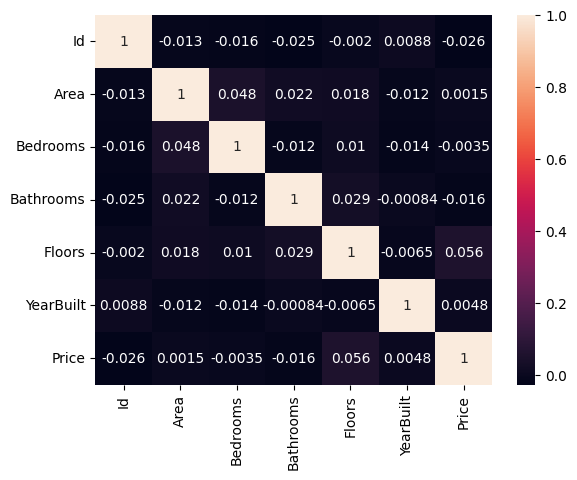

In [15]:
sns.heatmap(df.drop(['Location', 'Condition', 'Garage'], axis=1).corr(), annot=True)

Most Expensive and Cheapest House in our data

In [19]:
expensive = df.sort_values(by='Price', ascending=False).head(1)
cheap = df.sort_values(by='Price').head(1)
print('Expensive: \n', expensive)
print('Cheap: \n', cheap)

Expensive: 
         Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location Condition  \
1004  1005  3099         1          2       3       1997  Suburban      Good   

     Garage   Price  
1004     No  999656  
Cheap: 
         Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt Location Condition  \
1167  1168  4260         2          2       1       1907    Rural      Fair   

     Garage  Price  
1167    Yes  50005  


Bedrooms Vs. Bathrooms

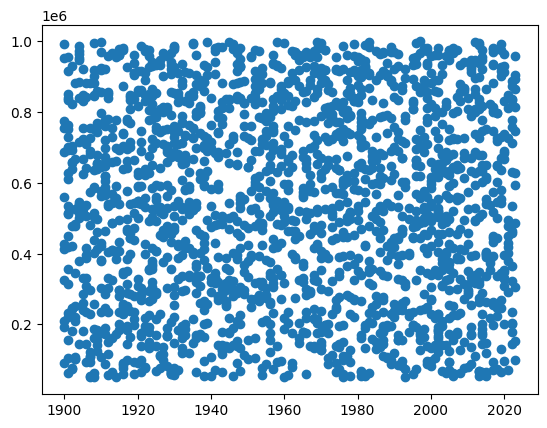

In [23]:
plt.plot(df['YearBuilt'], df['Price'], 'o')

Average house price at each Location

C:\Users\Abid\AppData\Local\Temp\ipykernel_4956\1411045237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.drop(['Condition', 'Garage'], axis=1).groupby('Location').agg('mean')['Price'].round(2), palette=palette_color)
C:\Users\Abid\AppData\Local\Temp\ipykernel_4956\1411045237.py:4: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(df.drop(['Condition', 'Garage'], axis=1).groupby('Location').agg('mean')['Price'].round(2), palette=palette_color)


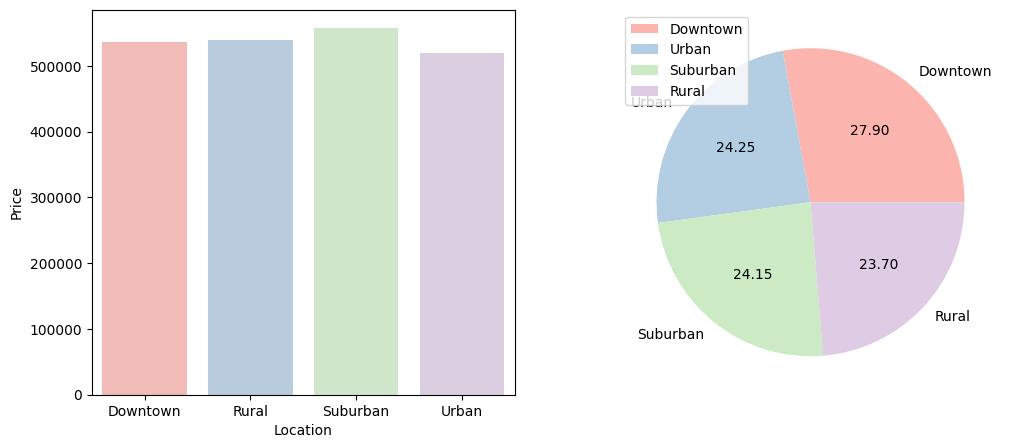

In [64]:
palette_color = sns.color_palette('Pastel1') 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(df.drop(['Condition', 'Garage'], axis=1).groupby('Location').agg('mean')['Price'].round(2), palette=palette_color)
plt.subplot(1,2,2)
plt.pie(df['Location'].value_counts(), autopct='%0.2f', labels=df['Location'].value_counts().index, colors=palette_color)
plt.legend()
plt.show()

Average house price at different conditions

C:\Users\Abid\AppData\Local\Temp\ipykernel_4956\2715950323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.drop(['Location', 'Garage'], axis=1).groupby('Condition').agg('mean')['Price'].round(2), palette=palette_color)
C:\Users\Abid\AppData\Local\Temp\ipykernel_4956\2715950323.py:4: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(df.drop(['Location', 'Garage'], axis=1).groupby('Condition').agg('mean')['Price'].round(2), palette=palette_color)


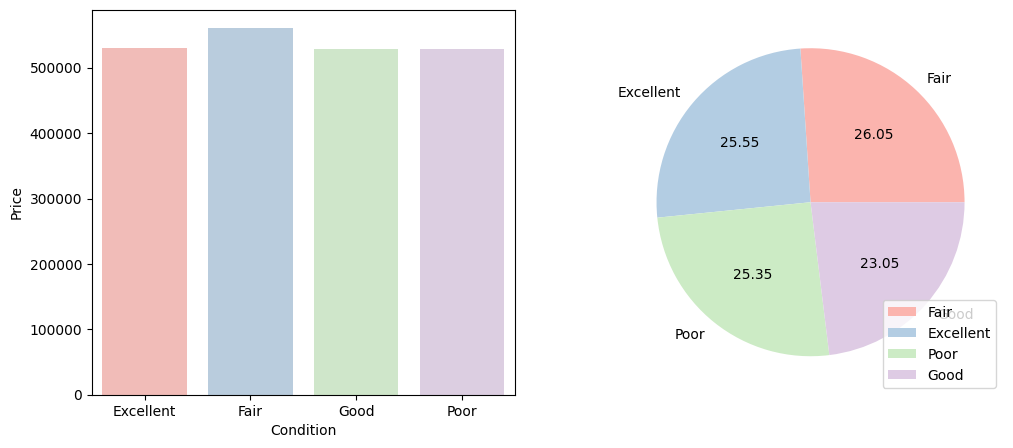

In [68]:
palette_color = sns.color_palette('Pastel1') 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(df.drop(['Location', 'Garage'], axis=1).groupby('Condition').agg('mean')['Price'].round(2), palette=palette_color)
plt.subplot(1,2,2)
plt.pie(df['Condition'].value_counts(), autopct='%0.2f', labels=df['Condition'].value_counts().index, colors=palette_color)
plt.legend()
plt.show()

C:\Users\Abid\AppData\Local\Temp\ipykernel_4956\2919567202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.drop(['Location','Condition'], axis=1).groupby('Garage').agg('mean')['Price'].round(2), palette=palette_color)
C:\Users\Abid\AppData\Local\Temp\ipykernel_4956\2919567202.py:4: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(df.drop(['Location','Condition'], axis=1).groupby('Garage').agg('mean')['Price'].round(2), palette=palette_color)


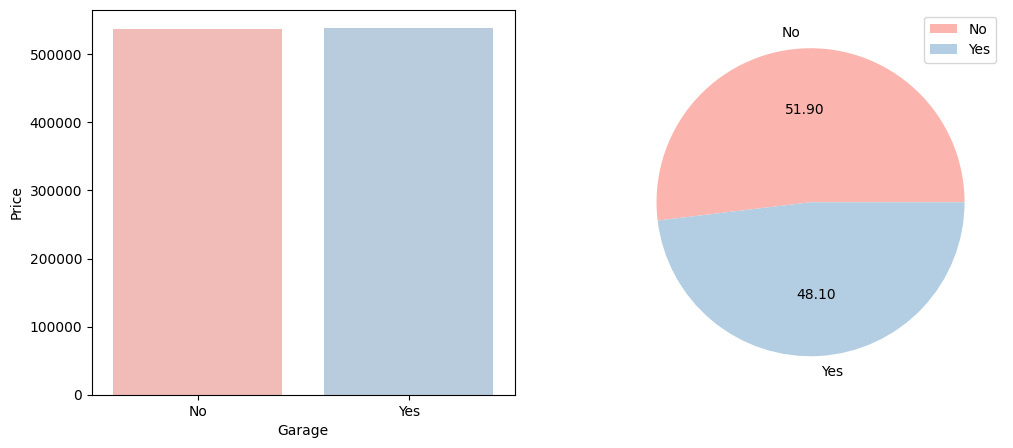

In [69]:
palette_color = sns.color_palette('Pastel1') 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(df.drop(['Location','Condition'], axis=1).groupby('Garage').agg('mean')['Price'].round(2), palette=palette_color)
plt.subplot(1,2,2)
plt.pie(df['Garage'].value_counts(), autopct='%0.2f', labels=df['Garage'].value_counts().index, colors=palette_color)
plt.legend()
plt.show()

Number of floors vs. rooms

In [72]:
df['Bedrooms'].value_counts()

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64